<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *7*: *Classification With Neural Networks***

### **Tenggat Waktu: 4 Desember 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **4 Desember 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


**Catatan:**
Harap jangan menunda - nunda mengerjakan karena Tutorial 7 kali ini cukup banyak pertanyaan yang harus dijawab.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [266]:
# Isi dengan data diri Anda
NAMA = "Muhammad Irfan Junaidi"
KELAS = "A"
NPM = "1906293202"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "1906350566",
    "1906353776",
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [267]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Irfan Junaidi dari kelas A dengan NPM 1906293202, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Irfan Junaidi)


# Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

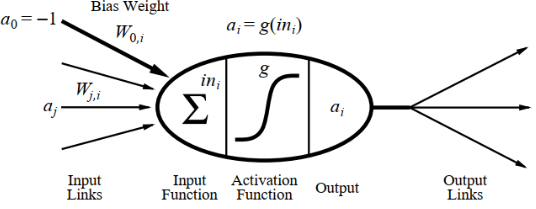

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

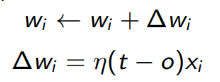

Penjelasan variabel pada rumus:
- wi merupakan weight untuk input ke-i
- xi merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

# Klasifikasi dengan Neural Network

## Eksplorasi Dataset

Pada tutorial ini, dataset yang digunakan adalah dataset Iris. Dataset Iris adalah dataset multivariat yang diperkenalkan oleh Ronald Fisher pada tahun 1936 melalui penelitiannya yang berjudul "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***". 
  
Dataset ini berisi informasi tentang komponen bunga serta spesiesnya. Dataset ini berisi 50 baris sampel dari setiap spesies. Total terdapat 3 buah spesies dengan masing - masing berjumlah 50 baris data. Dataset ini berisi kolom sebagai berikut:

1.  **sepal_length** (Dalam unit centimeter, float)
2.  **sepal_width** (Dalam unit centimeter, float)
3.  **petal_length** (Dalam unit centimeter, float)
4.  **petal_width** (Dalam unit centimeter, float)
5.  **species** (3 Kelas, string)

Mari kita lihat apa saja informasi yang bisa kita dapatkan dari dataset ini!

In [268]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from pandas.plotting import parallel_coordinates

Dataset yang digunakan diambil dari UCI machine learning. Pastikan laptop Anda terhubung dengan internet. Kemudian, karena dataset ini tidak memiliki header, maka header harus ditambahkan secara manual

In [269]:
#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [270]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Seperti yang terlihat pada output dari cell di atas, terlihat bahwa dataset memiliki 3 buath kelas yang masing - masing berjumlah sama. Sehingga bisa dikatakan dataset ini  tidak memiliki ketimpangan data

Setelah mendapatkan informasi terkait jumlah species, saatnya melakukan eksplorasi lebih jauh

In [271]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


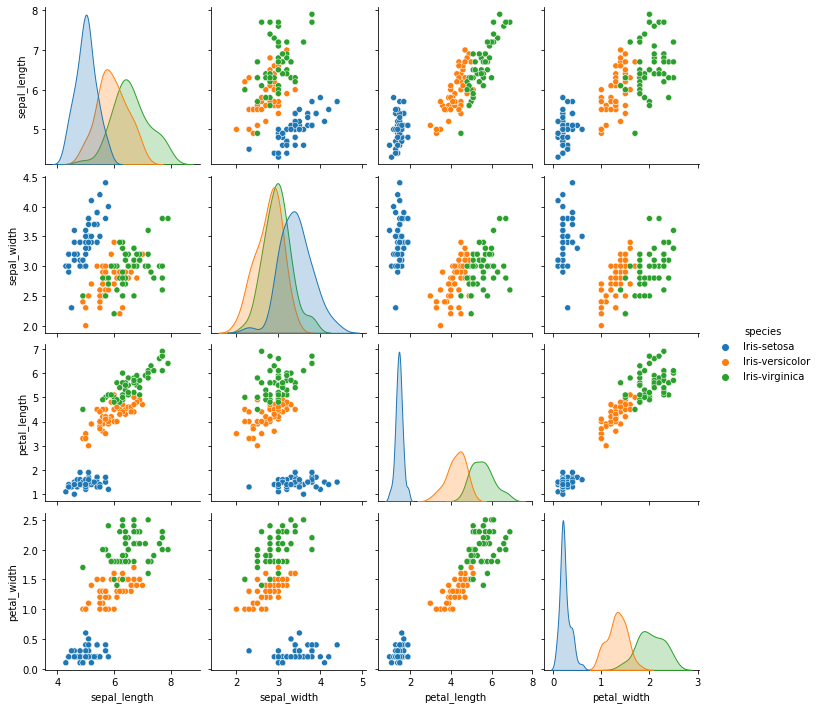

In [272]:
# Visualisasi dengan Pair Plotting

sns.pairplot(data=dataset, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species')

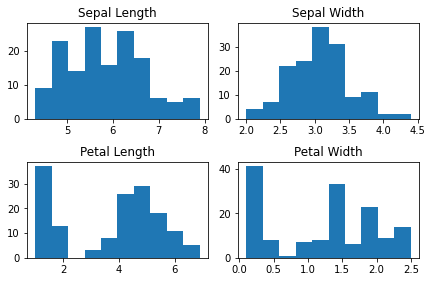

In [273]:
# Visualisasi dengan Bar Chart

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(dataset['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(dataset['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(dataset['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(dataset['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

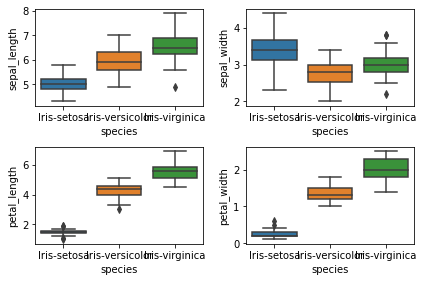

In [274]:
# Visualisasi dengan Boxplot

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

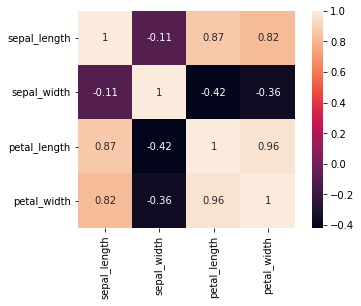

In [275]:
# Visualisasi Menggunakan Heatmap
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

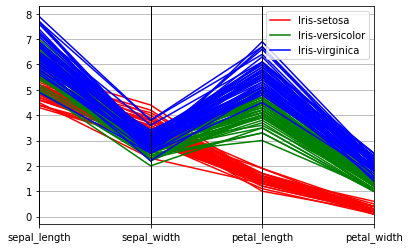

In [276]:
# Visualisasi Menggunakan Parallel Coordinate
parallel_coordinates(dataset, "species", color = ['red', 'green', 'blue']);

Setelah eksplorasi data selesai, sekarang saatnya membuat Classifier untuk Neural Network yang kita gunakan untuk dataset iris ini. Pembentukan classifier dilakukan pada section berikutnya

## Preprocessing Data

Pada bagian ini akan dilakukan preprocessing data pada dataset iris. Preprocessing melibatkan:
- Normalisasi Dataset
- Variable Encoding
- Pemisahan data menjadi X_train, X_test, y_train, dan y_test

Hal ini diperlukan agar Neural Network dapat menerima data dengan format yang sesuai ekspektasi algoritma tersebut,

### Pertanyaan A.1
Berdasarkan dataframe yang digunakan, silakan Anda lakukan normalisasi dataframe tersebut
menggunakan jenis normalisasi Min-Max. Normalisasi dilakukan untuk semua kolom, kecuali kolom species.

In [277]:
# Jawaban A.1
# TODO: Tuliskan kode disini (Ganti None dengan jawaban)
dataset_norm = pd.DataFrame(MinMaxScaler().fit_transform(dataset.drop(['species'], axis=1)), columns=colnames[:4]).join(dataset['species'])

In [278]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
5,0.305556,0.791667,0.118644,0.125000,Iris-setosa
6,0.083333,0.583333,0.067797,0.083333,Iris-setosa
7,0.194444,0.583333,0.084746,0.041667,Iris-setosa
8,0.027778,0.375000,0.067797,0.041667,Iris-setosa
9,0.166667,0.458333,0.084746,0.000000,Iris-setosa


### Pertanyaan A.2
Silakan lakukan penggantian informasi species pada data sehingga yang awalnya berupa string menjadi bentuk integer.
Ikuti aturan konversi berikut:

Iris-setosa -> 1  
Iris-versicolor -> 2  
Iris-virginica -> 3

Kemudian tampilkan 10 baris data pertama

In [279]:
# Jawaban A.2
label_encoder = LabelEncoder()
dataset_norm['species'] = label_encoder.fit_transform(dataset_norm['species']) + 1
dataset_norm.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
5,0.305556,0.791667,0.118644,0.125000,1
6,0.083333,0.583333,0.067797,0.083333,1
7,0.194444,0.583333,0.084746,0.041667,1
8,0.027778,0.375000,0.067797,0.041667,1
9,0.166667,0.458333,0.084746,0.000000,1


Berikut ini adalah ekspektasi Jawaban Pertanyaan A.1 dan A.2 sebelum melanjutkan ke tahap selanjutnya. Harap periksa kembali sebelum melanjutkan agar tidak terjadi kesalahan di tahap berikutnya
  

<img src="https://i.ibb.co/Cmwr5fT/Screen-Shot-2021-11-24-at-13-06-25.png" alt="Fasilkom UI" width="500"/>

In [280]:
from sklearn.model_selection import train_test_split

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test

X = dataset_norm.iloc[:,:-1]
y = dataset_norm.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

## Klasifikasi dengan Neural Network

Pada bagian ini kita akan melakukanklasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn. Pada kasus klasifikasi, kasus utama yang akan kita selesaikan adalah:
  

**Prediksi jenis species pada dataset Iris**
  

Catatan: Neural network membutuhkan data yang seluruhnya berisi data numerik, kemudian karena dataset yang kita gunakan tidak semuanya berisi data numerik, maka perlu dilakukan penyesuaian. **Jadi harap selesaikan terlebih dulu pertanyaan A.1 & A.2 sebelum melanjutkan ke tahap ini**

### Pembentukan Classifier & Training

Seperti pada classifier yang telah dipelajari sebelumnya (SVM, dan lainnya), MLPClassifier juga memiliki konfigurasi berupa hyperparameter yang bisa dikustomisasi sesuai kebutuhan.

Informasi lebih lanjut terkait parameter, bisa dilihat disini:  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [281]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True,
)

In [282]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              solver='lbfgs', verbose=True)

### Evaluasi
Evaluasi menggunakan beberapa metrik evaluasi untuk mengetahui seberapa baik performa yang didapatkan.  
  
Mencari tahu bagaimana hasil prediksi yang dihasilkan oleh MLPClassifier.
Hasil yang dikembalikan adalah berupa array yang berisi angka dengan rentang [1,3], dimana setiap angka merepresentasikan berikut:  

*   1 -> Iris-setosa
*   2 -> Iris-versicolor
*   3 -> Iris-virginica

Prediksi menggunakan dataframe yang digunakan untuk testing yang secara keseluruhan berjumlah 30% dari data

In [283]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 2 2 2 3 1 1 2 2 1 3 2 3 3
 1 3 2 3 3 1 2 3]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


#### Fungsi Evaluasi (Klasifikasi)
Fungsi ini dapat digunakan kembali jika Anda memerlukannya untuk menjawab pertanyaan atau bereksperimen.

In [284]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.93      0.88      0.90        16
           3       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9264957264957264
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9305555555555555
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.927741935483871
F1 Micro Average: 0.9333333333333333


Confusion Matrix



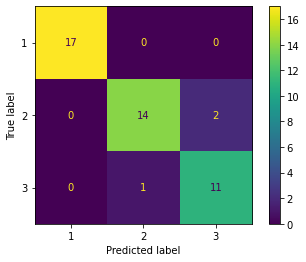

In [285]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Hasil evaluasi yang didapatkan sudah sangat baik. Hasil didapatkan akurasi sebesar 93%. Eits, tapi tunggu dulu, hasil ini bisa berubah lho tergantung bagaimana konfigurasi hyperparameter (atau yang akrab disebut dengan *Hyperparameter tuning*) yang Anda lakukan

### Pertanyaan A.3

Lakukan hyperparameter tuning pada MLPClassifier dengan spesifikasi sebagai berikut:  
*   Solver: SGD (Stochastic Gradient Descent) 
*   Activation Function: ReLU
*   Early Stopping: True
*   Learning Rate: Invscaling
*   Learning Rate Init: 1e-5

Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [286]:
classifier = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True,
    activation='relu',
    early_stopping=True,
    learning_rate='invscaling',
    learning_rate_init=1e-5
)

classifier.fit(X_train, y_train)

Iteration 1, loss = 1.25653171
Validation score: 0.181818
Iteration 2, loss = 1.25652482
Validation score: 0.181818
Iteration 3, loss = 1.25652118
Validation score: 0.181818
Iteration 4, loss = 1.25651773
Validation score: 0.181818
Iteration 5, loss = 1.25651446
Validation score: 0.181818
Iteration 6, loss = 1.25651135
Validation score: 0.181818
Iteration 7, loss = 1.25650841
Validation score: 0.181818
Iteration 8, loss = 1.25650562
Validation score: 0.181818
Iteration 9, loss = 1.25650298
Validation score: 0.181818
Iteration 10, loss = 1.25650047
Validation score: 0.181818
Iteration 11, loss = 1.25649810
Validation score: 0.181818
Iteration 12, loss = 1.25649586
Validation score: 0.181818
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fit

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, solver='sgd', verbose=True)

In [287]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852
Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

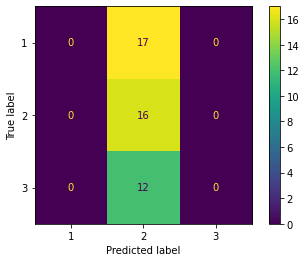

In [288]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Melakukan hyperparameter tuning sesuai dengan kriteria di atas membuat model yang dibuat memiliki performa yang lebih buruk secara keseluruhan dibandingkan dengan model awal. Dalam proses pembentukan model kedua, dapat dilihat bahwa tidak terjadi peningkatan yang cukup signifikan pada validation score-nya, sehingga dihentikan. Ternyata dalam melakukan hyperparameter tuning, tidak selalu membuat model yang dibuat menjadi lebih baik, bisa saja malah menjadi lebih buruk.

### Pertanyaan A.4

Lakukan hal yang sama dengan pertanyaan B.1 namun dengan kondisi berikut: 
*   Solver: Adam   
  
Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [289]:
classifier = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    # max_iter=750,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

classifier.fit(X_train, y_train)

Iteration 1, loss = 1.29852813
Iteration 2, loss = 1.29600600
Iteration 3, loss = 1.29350588
Iteration 4, loss = 1.29103061
Iteration 5, loss = 1.28857369
Iteration 6, loss = 1.28612400
Iteration 7, loss = 1.28368932
Iteration 8, loss = 1.28126962
Iteration 9, loss = 1.27887126
Iteration 10, loss = 1.27648569
Iteration 11, loss = 1.27410318
Iteration 12, loss = 1.27173318
Iteration 13, loss = 1.26937881
Iteration 14, loss = 1.26704298
Iteration 15, loss = 1.26471969
Iteration 16, loss = 1.26242172
Iteration 17, loss = 1.26015194
Iteration 18, loss = 1.25789859
Iteration 19, loss = 1.25566363
Iteration 20, loss = 1.25345119
Iteration 21, loss = 1.25126378
Iteration 22, loss = 1.24908299
Iteration 23, loss = 1.24691675
Iteration 24, loss = 1.24476786
Iteration 25, loss = 1.24263353
Iteration 26, loss = 1.24052283
Iteration 27, loss = 1.23843302
Iteration 28, loss = 1.23635989
Iteration 29, loss = 1.23430833
Iteration 30, loss = 1.23227623
Iteration 31, loss = 1.23026298
Iteration 32, los

C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              verbose=True)

In [290]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 3 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 3 2 3 3
 2 3 2 3 3 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.38      0.81      0.52        16
           3       0.73      0.67      0.70        12

    accuracy                           0.47        45
   macro avg       0.37      0.49      0.41        45
weighted avg       0.33      0.47      0.37        45


Accuracy: 0.4666666666666667
Precision Macro Average: 0.3698752228163993
Precision Micro Average: 0.4666666666666667
Recall Macro Average: 0.4930555555555555
Recall Micro Average: 0.4666666666666667
F1 Macro Average: 0.4052173913043478
F1 Micro Average: 0.4666666666666667


Confusion Matrix



C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

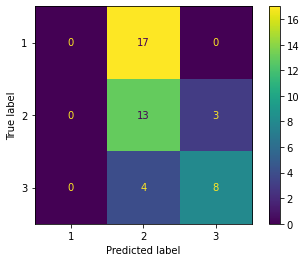

In [291]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Melakukan hyperparameter tuning sesuai dengan kriteria di atas juga membuat model yang dibuat memiliki performa yang lebih buruk secara keseluruhan dibandingkan dengan model awal. Namun, jika dilihat proses pembuatan modelnya, dalam 200 iterasi, model terus mengalami peningkatan. Hal ini menunjukkan bahwa adanya potensi model menjadi lebih baik dengan jumlah iterasi yang lebih banyak. Dicoba dengan 750 iterasi, model dengan hypermarameter di atas dapat mengalahkan model awal.

### Evaluasi dengan Classifier Lain
Mari kita lihat bagaimana performa Neural Network jika dibandingkan dengan classifier lain

#### Decision Tree (Gini & Entropy)
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Decision Tree. Kali ini menggunakan variasi Gini & Entropy untuk Decision Tree.

In [293]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.84      1.00      0.91        16
           3       1.00      0.75      0.86        12

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9473684210526315
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9166666666666666
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.9238095238095237
F1 Micro Average: 0.9333333333333333


Confusion Matrix



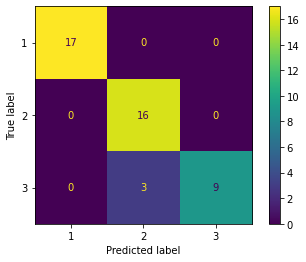

In [294]:
# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt_gini)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.82      0.88      0.85        16
           3       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45


Accuracy: 0.8888888888888888
Precision Macro Average: 0.8805704099821746
Precision Micro Average: 0.8888888888888888
Recall Macro Average: 0.875
Recall Micro Average: 0.8888888888888888
F1 Macro Average: 0.8770311813790075
F1 Micro Average: 0.8888888888888888


Confusion Matrix



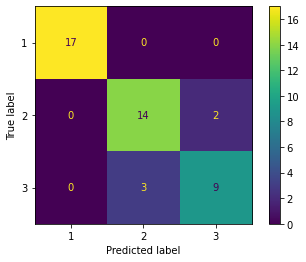

In [295]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(classifier_dt_entropy, prediction_dt_entropy)

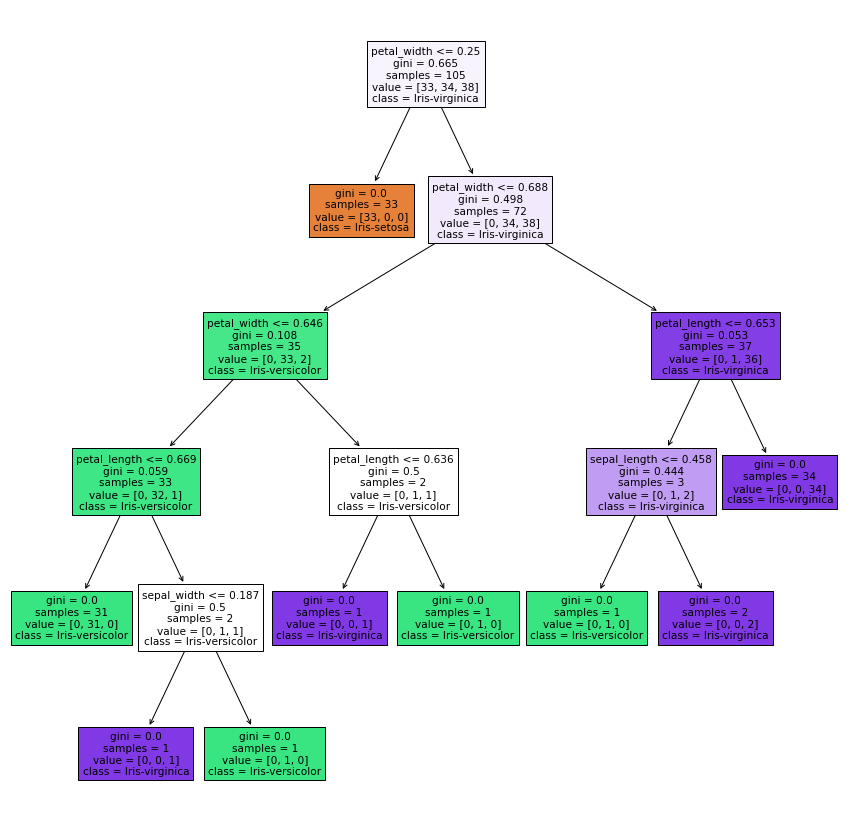

In [296]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_gini, feature_names = fn, class_names = cn, filled = True);

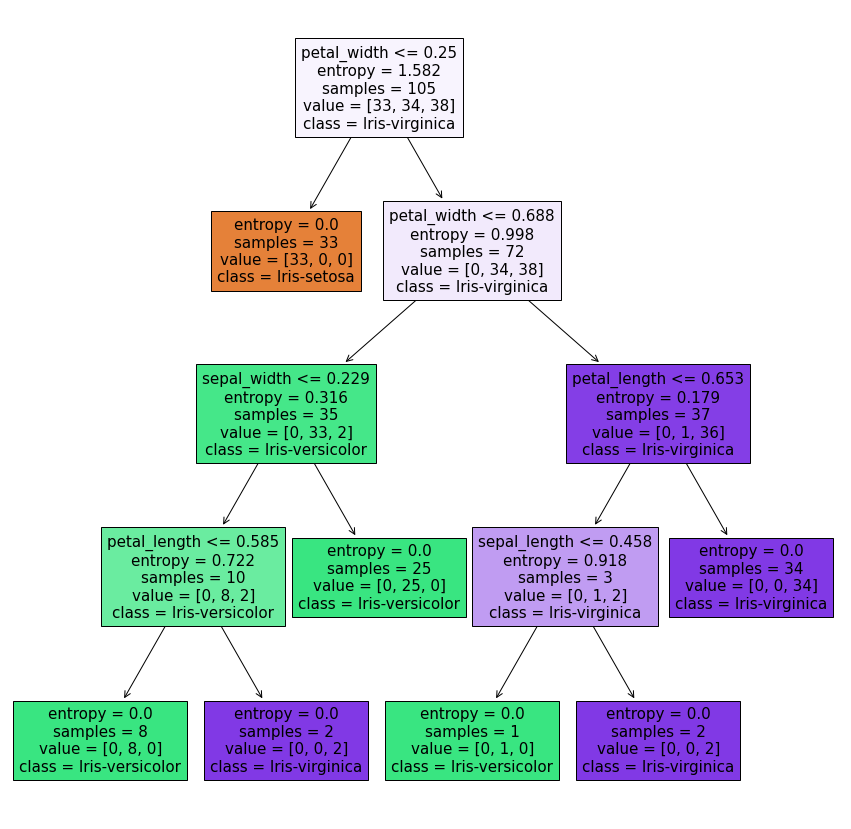

In [297]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_entropy, feature_names = fn, class_names = cn, filled = True);

#### KNN
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 0.9777777777777777
Precision Macro Average: 0.9803921568627452
Precision Micro Average: 0.9777777777777777
Recall Macro Average: 0.9722222222222222
Recall Micro Average: 0.9777777777777777
F1 Macro Average: 0.9754062362758015
F1 Micro Average: 0.9777777777777777


Confusion Matrix



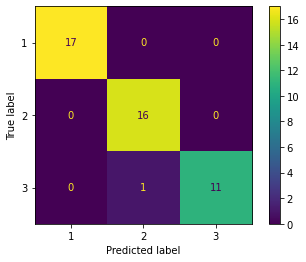

In [299]:
evaluate_classifier_performance(knn, knn_pred)

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Naive Bayes

In [300]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



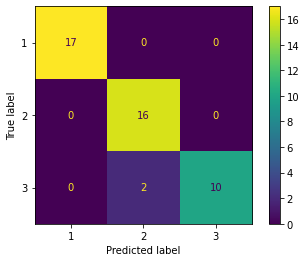

In [301]:
evaluate_classifier_performance(bayes, bayes_pred)

#### SVM
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan SVM

In [302]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



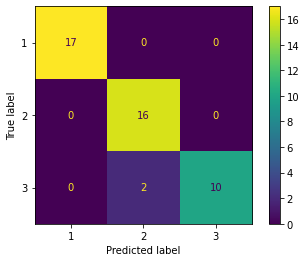

In [303]:
evaluate_classifier_performance(svm, svm_pred)

# Pertanyaan Bagian B

Pertanyaan A adalah pertanyaan yang disematkan di tengah - tengah tutorial. Pertanyaan B adalah pertanyaan diluar tutorial. Pada bagian ini Anda diharuskan menerepkan membuat model Neural Network untuk kasus klasifikasi

### Penjelasan Dataset

Dataset yang digunakan adalah dataset Perubahan berat badan, kalori, dan pola olahraga pada tahun 2018

Penjelesan atribut:
*   **date** : Date of observations.
*   **stone, pounds, ounces** : measured weight
*   **weight_oz** : Total weight in ounces
*   **calories** : Approximate calories consumed on that date
*   **calsperoz** : calories per ounce - calories for that day divided by weight in ounces
*   **five_donuts** : day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE
*   **walk** : day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE
*   **run**: day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE
*   **wine** : day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE
*   **prot** : day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE
*   **weight** : signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE
*   **change** : change in weight in oz

In [304]:
# Import Dataset
# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KChrqfvQEiQmEPu1171eEbG7LOtrxbA6' -O diet_data.csv

diet_data = pd.read_csv('https://docs.google.com/uc?export=download&id=1KChrqfvQEiQmEPu1171eEbG7LOtrxbA6')

diet_data.head(n=10)

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0
5,8/4/2018,11.0,13.0,6.0,2678.0,3600.0,1.34,0.0,0.0,0.0,0.0,0.0,0.0,14.0
6,8/5/2018,12.0,0.0,4.0,2692.0,2400.0,0.89,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
7,8/6/2018,12.0,0.0,2.0,2690.0,3100.0,1.15,1.0,1.0,0.0,0.0,0.0,0.0,6.0
8,8/7/2018,12.0,0.0,8.0,2696.0,2200.0,0.82,1.0,1.0,0.0,0.0,0.0,0.0,-8.0
9,8/8/2018,12.0,0.0,0.0,2688.0,1800.0,0.67,1.0,1.0,0.0,0.0,0.0,0.0,-40.0


### Pertanyaan B.1
Menggunakan dataset yang diberikan (**diet_data.csv**) Silakan lakukan pemodelan klasifikasi menggunakan **MLPClassifier** untuk memprediksi kolom **change**.  
  
Dikarenakan kolom change masih berupa numerik, silakan ubah terlebih dahulu mengikuti ketentuan berikut:  
*   Jika change bernilai negatif (Misal -30.0), maka ubah menjadi angka **2**
*   Jika change bernilai positif (Misal 8.0), maka ubah menjadi angka **1**
*   Jika change bernilai nol (0.0), maka ubah menjadi angka **0**
*   Train : Test data memiliki perbandingan 70 : 30
*   Random state: 2021

Jawaban harus meliputi:  
1.   EDA (Exploratory Data Analysis)
2.   Data Preprocessing
3.   Pembentukan classifier dengan MLPClassifier
4.   Evaluasi menggunakan MLPClassifier (minimal mencakup Akurasi, Precision, Recall, dan F1)
5.   Evaluasi dan perbandingan menggunakan classifier lain (Minimal 3 classifier)




In [305]:
diet_data['change'] = diet_data['change'].apply(lambda x : 1 if x > 0 else 2 if x < 0 else 0)

In [306]:
diet_data.describe(include='all')

,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
count,150,142.000000,142.000000,142.000000,149.000000,140.000000,147,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,151.000000
unique,150,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/7/2018,NaN,NaN,NaN,NaN,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.535211,6.218310,3.577465,2560.724832,3180.714286,NaN,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,1.403974
std,NaN,0.500524,5.655746,2.915656,571.190848,1478.753433,NaN,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,0.684873
min,NaN,11.000000,0.000000,0.000000,0.000000,1400.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,11.000000,1.000000,0.000000,2662.000000,2187.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,12.000000,3.500000,4.000000,2688.000000,2575.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,NaN,12.000000,12.000000,6.000000,2704.000000,3850.000000,NaN,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,2.000000


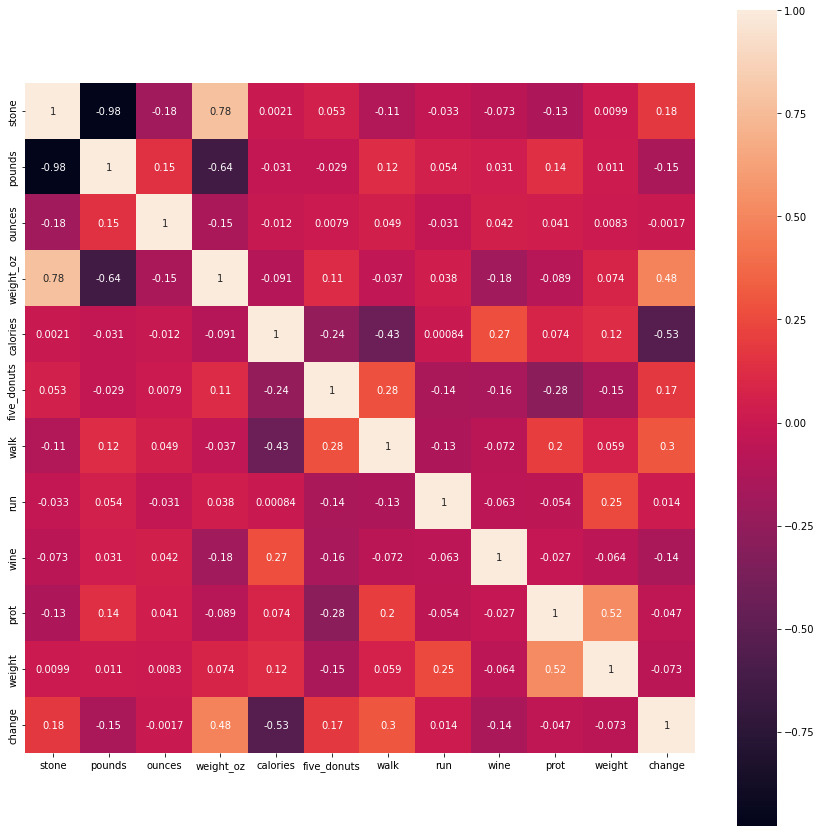

In [307]:
# Implementasi Pertanyaan B.1

# Visualisasi Menggunakan Heatmap
plt.figure(figsize=(15,15))
corrmat = diet_data.corr()
sns.heatmap(corrmat, annot = True, square = True);
plt.show()

In [308]:
# Mengatasi missing values
print(diet_data.isna().sum())
diet_data.dropna(inplace=True)
diet_data

date            1
stone           9
pounds          9
ounces          9
weight_oz       2
calories       11
cals_per_oz     4
five_donuts    11
walk           11
run            11
wine           11
prot           11
weight         11
change          0
dtype: int64


,date,stone,pounds,ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,2
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,1
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,2
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,12/15/2018,11.0,11.0,0.0,2640.0,5750.0,2.18,0.0,0.0,0.0,0.0,0.0,0.0,1
139,12/16/2018,11.0,12.0,0.0,2656.0,2950.0,1.11,0.0,1.0,1.0,0.0,0.0,0.0,0
140,12/17/2018,11.0,12.0,0.0,2656.0,1950.0,0.73,1.0,1.0,0.0,0.0,0.0,0.0,2
141,12/18/2018,11.0,10.0,8.0,2632.0,1900.0,0.72,0.0,1.0,0.0,0.0,0.0,0.0,2


In [309]:
# Mengatasi duplikasi data
print(diet_data.duplicated().sum())

0


In [310]:
def count_outlier(df, col):
    iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper = df[col].quantile(0.75) + (iqr * 1.5)
    lower = df[col].quantile(0.25) - (iqr * 1.5)
    return ((df[col] < lower) | (df[col] > upper)).sum()

print("Banyaknya outlier")
for i in diet_data.select_dtypes(include=np.number).columns:
    print(f"{i:25s}{count_outlier(diet_data, i)}")

Banyaknya outlier
stone                    0
pounds                   0
ounces                   0
weight_oz                3
calories                 5
five_donuts              0
walk                     0
run                      35
wine                     0
prot                     25
weight                   0
change                   0


Outlier dibiarkan karena jika dilihat datanya masih wajar.

In [311]:
# Exclude data tidak relevan
diet_data = diet_data.drop(['date'], axis=1)

In [312]:
# Normalisasi
diet_norm = pd.DataFrame(StandardScaler().fit_transform(diet_data.drop(['change'], axis=1)), columns=diet_data.columns[:-1])

In [330]:
# Membentuk 4 variabel X_train, X_test, y_train, dan y_test
X = diet_norm.iloc[:,:-1]
y = diet_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

MLPClassifier

In [331]:
classifier = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [332]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 1.06998082
Iteration 2, loss = 1.06540195
Iteration 3, loss = 1.06084438
Iteration 4, loss = 1.05633975
Iteration 5, loss = 1.05189203
Iteration 6, loss = 1.04747248
Iteration 7, loss = 1.04307622
Iteration 8, loss = 1.03871542
Iteration 9, loss = 1.03435860
Iteration 10, loss = 1.03004085
Iteration 11, loss = 1.02575614
Iteration 12, loss = 1.02142343
Iteration 13, loss = 1.01711776
Iteration 14, loss = 1.01284667
Iteration 15, loss = 1.00858814
Iteration 16, loss = 1.00436964
Iteration 17, loss = 1.00019359
Iteration 18, loss = 0.99606187
Iteration 19, loss = 0.99194305
Iteration 20, loss = 0.98786114
Iteration 21, loss = 0.98382408
Iteration 22, loss = 0.97983281
Iteration 23, loss = 0.97588793
Iteration 24, loss = 0.97198978
Iteration 25, loss = 0.96814958
Iteration 26, loss = 0.96437428
Iteration 27, loss = 0.96065202
Iteration 28, loss = 0.95697710
Iteration 29, loss = 0.95334929
Iteration 30, loss = 0.94976411
Iteration 31, loss = 0.94620848
Iteration 32, los

C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              verbose=True)

In [333]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 1 2 2 1 2 2 2 1 2 1 2 1 1
 2 1 1 2 2]

Ground Truth / Dataset Test Asli
[1 2 2 0 0 0 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 1 2 1 1
 2 1 1 2 2]


In [334]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        25

    accuracy                           0.88        42
   macro avg       0.61      0.62      0.61        42
weighted avg       0.83      0.88      0.85        42


Accuracy: 0.8809523809523809
Precision Macro Average: 0.6111111111111112
Precision Micro Average: 0.8809523809523809
Recall Macro Average: 0.6190476190476191
Recall Micro Average: 0.8809523809523809
F1 Macro Average: 0.6107226107226107
F1 Micro Average: 0.8809523809523809


Confusion Matrix



C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

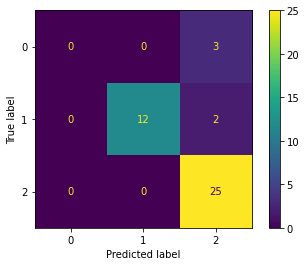

In [335]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Dapat dilihat bahwa model yang dibuat sudah cukup bagus Nilai Akurasi dan Macro validation score-nya. Namun, perlu diperhatikan bahwa model yang terbuat mendapatkan precision, recall, dan f1-score 0 untuk change yang ground truthnya 0. Ini terjadi karena dalam proses split dataset, data yang change-nya 0 hanya ada 3. Ketiga data tersebut pun berada pada data test sehingga tidak pernah ada training untuk change bernilai 0 pada model.

Decision Tree Gini

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.72      0.93      0.81        14
           2       0.82      0.72      0.77        25

    accuracy                           0.74        42
   macro avg       0.51      0.55      0.53        42
weighted avg       0.73      0.74      0.73        42


Accuracy: 0.7380952380952381
Precision Macro Average: 0.5134680134680135
Precision Micro Average: 0.7380952380952381
Recall Macro Average: 0.5495238095238095
Recall Micro Average: 0.7380952380952381
F1 Macro Average: 0.5261524822695036
F1 Micro Average: 0.7380952380952381


Confusion Matrix



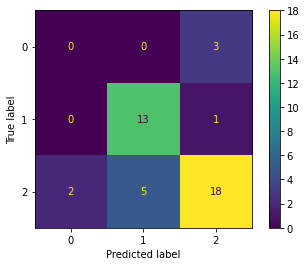

In [336]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt_gini)

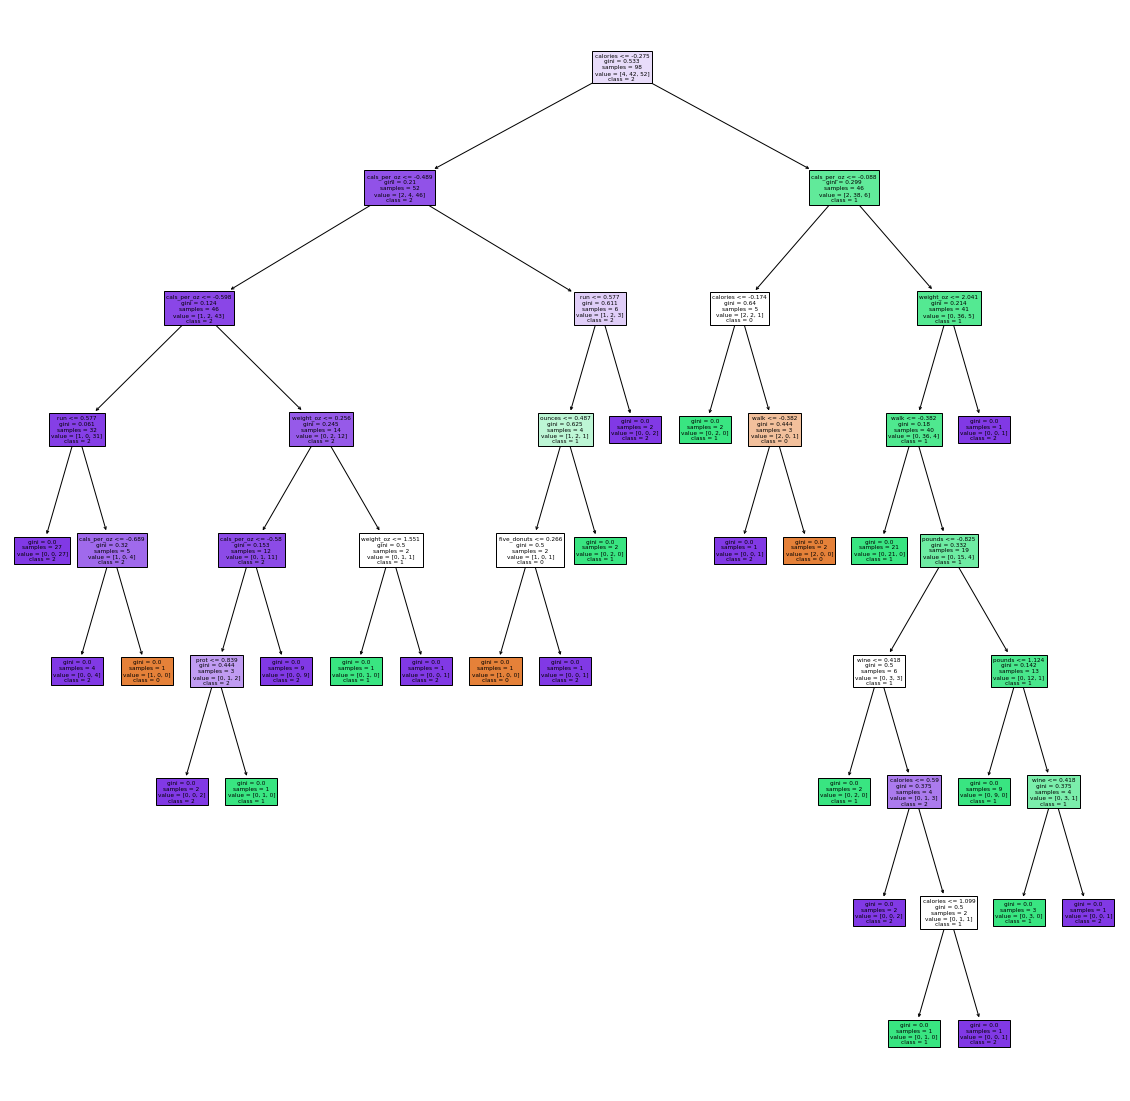

In [337]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (20,20))
plot_tree(classifier_dt_gini, feature_names = diet_data.columns, class_names = ['0', '1', '2'], filled = True);

Decision Tree Entropy

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.72      0.93      0.81        14
           2       0.86      0.76      0.81        25

    accuracy                           0.76        42
   macro avg       0.53      0.56      0.54        42
weighted avg       0.75      0.76      0.75        42


Accuracy: 0.7619047619047619
Precision Macro Average: 0.5286195286195287
Precision Micro Average: 0.7619047619047619
Recall Macro Average: 0.5628571428571428
Recall Micro Average: 0.7619047619047619
F1 Macro Average: 0.5403368794326241
F1 Micro Average: 0.7619047619047619


Confusion Matrix



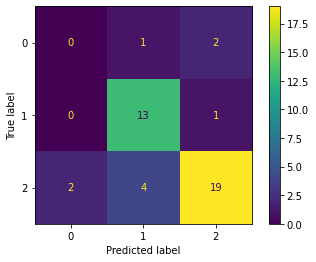

In [338]:
classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

# Evaluasi Varian Entropy
evaluate_classifier_performance(classifier_dt_entropy, prediction_dt_entropy)

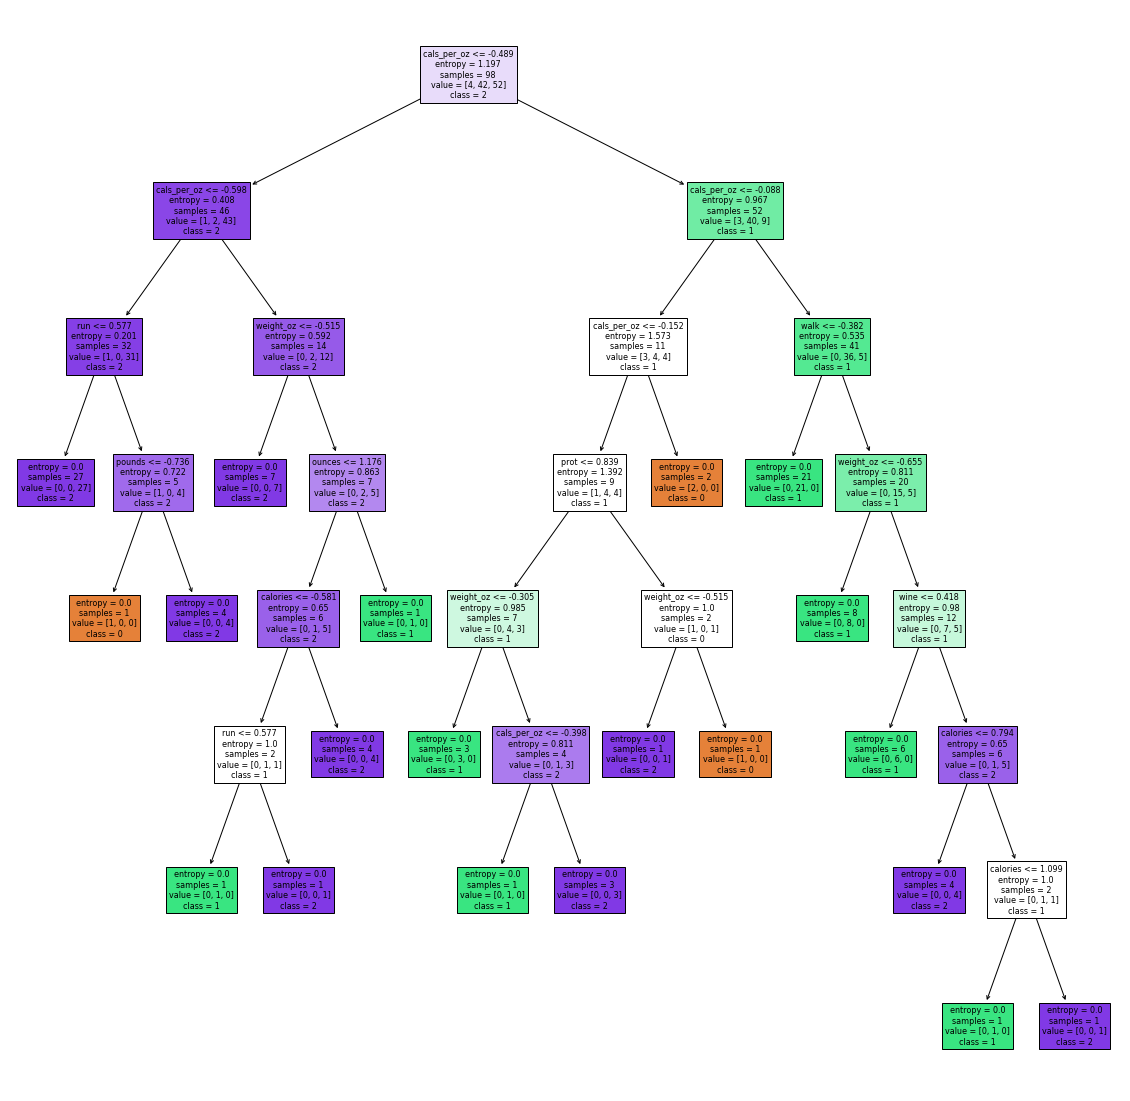

In [339]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (20,20))
plot_tree(classifier_dt_entropy, feature_names = diet_data.columns, class_names = ['0', '1', '2'], filled = True);

SVM

C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      0.79      0.81        14
           2       0.83      0.96      0.89        25

    accuracy                           0.83        42
   macro avg       0.56      0.58      0.57        42
weighted avg       0.77      0.83      0.80        42


Accuracy: 0.8333333333333334
Precision Macro Average: 0.5579133510167993
Precision Micro Average: 0.8333333333333334
Recall Macro Average: 0.5819047619047618
Recall Micro Average: 0.8333333333333334
F1 Macro Average: 0.5679012345679012
F1 Micro Average: 0.8333333333333334


Confusion Matrix



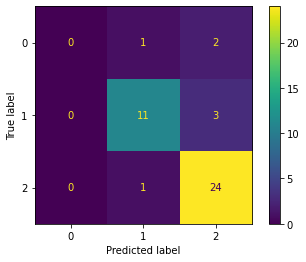

In [340]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

evaluate_classifier_performance(svm, svm_pred)

Jika dibandingkan ketiga classifier lainnya (Gini, Entropy, dan SVM), model SVM merupakan model yang performanya paling baik. Namun, SVM masih kalah bagusnya dibandingkan dengan MLP Classifier dalam performa keseluruhan. Hal ini dikarenakan MLP Classifier merupakan Classifier yang memanfaatkan neural network. Hal yang sama terjadi dengan soal sebelumnya terkait klasifikasi change 0 yang diakibatkan proses split test yang kurang baik.

### Pertanyaan B.2
1. Pada rumus untuk melakukan update terhadap weight/bobot, apabila nilai variabel o lebih besar daripada t, apakah nilai weight setelah di-update lebih besar daripada nilai sebelum di-update? Jelaskan alasannya.
2. Dari jawaban yang Anda dapatkan dari B.1, apakah MLP lebih baik daripada classifier lain yang Anda gunakan? Mengapa hal tersebut bisa terjadi? Apa kesimpulan Anda ?

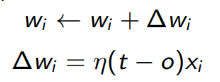

 ### Jawaban Pertanyaan B.2
 1. Belum tentu. Dari rumus, (t - o) jika o lebih besar dari t akan menghasilkan bilangan negatif. Nilai x<sub>i</sub> bisa saja positif sehingga nilai w<sub>i</sub> setelah di-update menjadi lebih kecil.
 2. Belum tentu. Ada waktu di mana classifier lain performanya lebih baik dibandingkan dengan MLP jika hyperparameter MLP tidak baik. Bagaimana kita menentukan hyperparameter MPL Classifier kita akan menentukan bagaimana model yang nantinya dihasilkan. Sehingga dapat disimpulkan bahwa MLP sangat bergantung dengan hyperparameter yang digunakan untuk dataset tertentu.